In [1]:
using LinearAlgebra
using Plots
include("polynodes.jl")
include("aux_hfd.jl")
include("hfdTypes.jl")
include("postprocess.jl")

Main.HfdPostProcess

In [2]:
occ = Dict(
    -1 => [2 2 2 2 2 2], #s1/2
    1  => [2 2 2 2 2],   #p1/2
    -2 => [4 4 4 4 4],   #p3/2
    2  => [4 4 4],     #d3/2
    -3 => [6 6 6],     #d5/2
    3  => [6 1], #f5/2
    -4 => [8]
    )
#occ = Dict(-1 => [2 2],
#            1 => [2],
#            -2 => [4])
#occ = Dict(-1 => [2])
N, Nprec=157, 250
Z=90e0
grid = hfd_funcs.leg_rat_grid(N, 1e0)
#grid_prec = hfd_funcs.leg_exp_grid(Nprec, grid.xs[end])
cpars = hfd_funcs.CalcParams(Z, length(grid.xs);scale =0.5, alpha=1e-8)
cpars = hfd_funcs.CalcParams(Z, length(grid.xs);scale =0.5)
#cpars_prec = hfd_funcs.CalcParams(Z, length(grid_prec.xs))
@show(N=length(grid.xs))
occ_block, ztot = hfd_funcs.from_dict(occ, Float64, N)
println("Ztot=$ztot, sum_occs = $(sum(occ_block.occs))")
@time hfd_funcs.hcore_calc!(cpars, grid, occ_block)
@time hs = hfd_funcs.sc_coul_calc!(cpars, grid, occ_block; tol=1e-5, dump=0.5, maxiter=20, rc_hard=50);

N = length(grid.xs) = 157
Ztot=92.0, sum_occs = 87.0
+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 90.0
!atomic scale: 0.5 a.e
|fine structure constant: 0.0072973525643
|number of nodes in radial grid: 157
|maximal iteration number: 3
|tolerance: 1.0e-6
|dumping: 0.5 
| maximal rcut: 30.0 a.e.
|aitken accelerated: false
|non-interacting electrons approximation


+=========================================================
iter no: 1
κ      |δpot|
-4  0.0
-3  0.0
-2  0.0
-1  0.0
1  0.0
2  0.0
3  0.0
orbital energies:
[-4617.757547954371, -1192.2892134607414, -512.1999907850234, -280.93897235300415, -176.66733468254043, -121.13852759387369, -1192.2892134559547, -512.1999907853509, -280.93897235307674, -176.66733468245798, -121.13852759400098, -467.18248660959966, -262.1737440430451, -167.17418379446195, -1041.3745048005271, -467.1824866095611, -262.17374404290314, -167.1741837943721, -115.69921458720744

In [3]:
rep = HfdPostProcess.report(cpars, grid, occ_block; sortBy=:rhoav)

25×6 Matrix{Float64}:
 -1.0  1.0  -3999.99      1.0  0.0141456  0.000280335
  1.0  2.0   -709.486     1.0  0.0478055  0.00289059
 -2.0  1.0   -585.832     1.0  0.0577568  0.0040657
 -1.0  2.0   -737.754     1.0  0.0587761  0.00416277
  2.0  2.0   -123.909     1.0  0.140301   0.0231048
  1.0  3.0   -171.848     1.0  0.144317   0.0243986
 -3.0  1.0   -118.157     1.0  0.14563    0.0247634
 -1.0  3.0   -184.39      1.0  0.153249   0.02703
 -2.0  2.0   -143.662     1.0  0.162339   0.0306285
  1.0  4.0    -40.8359    1.0  0.33403    0.127203
 -1.0  4.0    -46.3455    1.0  0.334831   0.126775
  2.0  3.0    -24.86      1.0  0.369644   0.157653
 -2.0  3.0    -33.5939    1.0  0.37104    0.15645
  3.0  2.0    -12.1267    1.0  0.374908   0.165597
 -4.0  1.0    -11.7944    1.0  0.380561   0.170485
 -3.0  2.0    -23.5345    1.0  0.380875   0.16712
 -1.0  5.0    -10.6834    1.0  0.706215   0.558121
  1.0  5.0     -8.60549   1.0  0.739068   0.614103
 -2.0  4.0     -6.94172   1.0  0.821548   0.758512


In [4]:
#cpars = hfd_funcs.CalcParams(Z, length(grid.xs);scale =0.5)
@time hfd_funcs.hfd_calc!(cpars, grid, occ_block; tol=1e-5, dump=0.3,
    maxiter=40, ecp=nothing, rc_hard=100);

+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 90.0
!atomic scale: 0.5 a.e
|fine structure constant: 0.0072973525643
|number of nodes in radial grid: 157
|maximal iteration number: 40
|tolerance: 1.0e-5
|dumping: 0.3 
| maximal rcut: 100 a.e.
|aitken accelerated: false
|Dirac Hartree Fock


+=========================================================
iter no: 1
κ      |δpot|
-4  0.5808205425320715
-3  0.5799960384006508
-2  0.5797171396752344
-1  0.5800842696860241
1  0.5802950559029305
2  0.580242371421254
3  0.580855165810743
orbital energies:
[-4069.3074040829256, -763.5583656866047, -196.2735433452211, -52.174161754354884, -12.740284661952705, -2.904936145926415, -734.2467343648555, -183.18794306491043, -46.29536845009644, -10.396501636535259, -2.1457030744449668, -133.34613033843797, -29.165194773372384, -5.028351867264739, -607.6344550432615, -153.7667101409581, -38.534979839251285, -8.5784824101

In [5]:
rep = HfdPostProcess.report(cpars, grid, occ_block; sortBy=:rhoav)

25×6 Matrix{Float64}:
 -1.0  1.0  -4064.7      1.0  0.0140819  0.000277871
  1.0  2.0   -730.588    1.0  0.0475207  0.00285666
 -2.0  1.0   -604.189    1.0  0.0574432  0.00402219
 -1.0  2.0   -760.12     1.0  0.0583868  0.00410939
  2.0  2.0   -130.924    1.0  0.139146   0.02273
  1.0  3.0   -180.772    1.0  0.143051   0.0239789
 -3.0  1.0   -124.968    1.0  0.144442   0.0243661
 -1.0  3.0   -193.949    1.0  0.151815   0.0265376
 -2.0  2.0   -151.504    1.0  0.160873   0.0301045
  1.0  4.0    -44.9711   1.0  0.330359   0.124251
 -1.0  4.0    -50.8696   1.0  0.331127   0.123842
  2.0  3.0    -27.9412   1.0  0.363211   0.152053
 -2.0  3.0    -37.3311   1.0  0.364918   0.151295
  3.0  2.0    -14.1571   1.0  0.36689    0.157939
 -4.0  1.0    -13.7921   1.0  0.372358   0.162531
 -3.0  2.0    -26.517    1.0  0.373909   0.160898
 -1.0  5.0    -12.1972   1.0  0.702365   0.550869
  1.0  5.0     -9.87644  1.0  0.734221   0.604835
 -2.0  4.0     -8.12599  1.0  0.80904    0.733958
  2.0  4.0     -

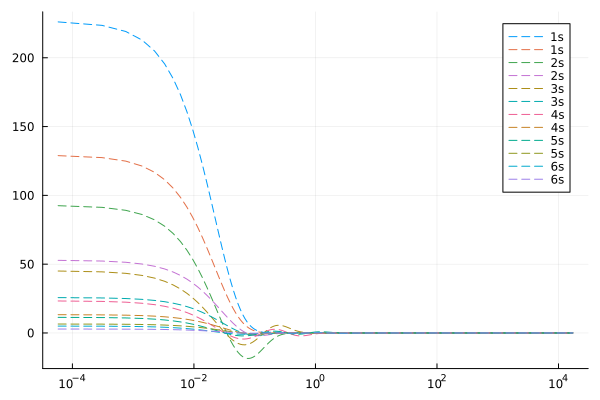

In [6]:
ds_inds = findall(occ_block.ks .== -1)
pqs = reshape(occ_block.vecs, cpars.N, 2, :)
plot()
for ii  in ds_inds
    plot!(grid.xs, pqs[:, :, ii]; xaxis=:log, label="$(occ_block.inds[ii])s", ls=:dash)
end
s_inds = findall(occ_block.ks .== -1)
for ii  in s_inds
#    plot!(grid.xs, pqs[:, :, ii]; xaxis=:log, label="$(occ_block.inds[ii])s", ls=:dot)
end
plot!()

In [556]:
include("recp.jl")
using .GausECP
#thorium gatchina sorep
lblk = ECPL{Float64}[]
soblk = ECPL{Float64}[]
Nel=60
GausECP.perm = [2, 1, 3]
#g
@ecp_blk lblk begin
   @_r 1   369.8978298568705  40.16886253269473      
   @_r 1   247.7655967328015  -75.84009176329934     
   @_r 2   201.1047071613469  1119.125617920092      
   @_r 2   149.6430016109879  -939.0212475237521     
   @_r 2   46.40820345015272  -158.9114782932650     
   @_r 2   33.21312110133701  54.34909097838379      
   @_r 2   23.27924832096906  -103.6155449221933     
   @_r 2   12.09743694899417  -21.48789486173877     
   @_r 2   6.715425102871503  -4.623176391720361     
   @_r 2   3.730670044853590  -0.4213014368523368    
   @_r 2   0.8740604208344924 -0.003534684399246564  
   @_r 2   0.5314586854464713  0.001299722959599601   
   @_r 2  0.3179053680475783  -0.0004241195633460222 
   @_r 2  0.06633123162449400 -0.0000170656793415232 
   @_r 2  0.01903637830471969 -0.00000304647146344   
   @_r 2  0.00757421576127823  0.00000050372193806137
end
# s-g 
@ecp_blk lblk begin
    @_r 0   185.6149912515295 10.00000000000000     
    @_r 1   72.69610545712889 1665.689924021051     
    @_r 1   50.62045400423052 -3162.409396416129    
    @_r 1   24.45651582576285 1544.845564349067     
    @_r 2   45.06701004657874 16686.03567120683     
    @_r 2   32.36396577224573 -22838.98909531935    
    @_r 2   23.47349275167025 17122.97056990629     
    @_r 2   17.00920816888125 -16493.01164388738    
    @_r 2   12.26004990448464 11122.52061428159     
    @_r 2   8.807471578860797 -5533.354025347027    
    @_r 2   6.303487518002028 2410.702817836725     
    @_r 2   4.481012333236060 -951.2552942569200    
    @_r 2   3.153715771217396 342.8842981647795     
    @_r 2   2.192760596053603 -112.5329043970451    
    @_r 2   1.503349725543504 32.74766569384701     
    @_r 2   1.015838734318231 -8.158457770475707    
    @_r 2  0.6773386777799915 1.638261011146533     
    @_r 2  0.4466685408353236 -0.2396255447741682   
    @_r 2  0.2906293427699985 0.01796864033091383   
end
# p-g
@ecp_blk lblk begin
    @_r 0   33.62238419942047 9.000000000000000     
    @_r 1   108.6498486022663 -10.46019428867366    
    @_r 1   63.44250624455074 32.08300662043577     
    @_r 1   37.52508190865536 50.96372440818211     
    @_r 1   23.82350781478851 -145.7224290972364    
    @_r 1   14.22396131155888 119.5147818145800     
    @_r 2   17.24977873563996 1296.825444132255     
    @_r 2   12.19266888096508 -2669.812590135937    
    @_r 2   8.799452270859081 2764.041714910161     
    @_r 2   6.404530227360024 -1592.803841628649    
    @_r 2   4.597933752868387 655.5382878557463     
    @_r 2   3.234766507524786 -209.3159924852027    
    @_r 2   2.230603879291048 52.28808778782674     
    @_r 2   1.487030742905809 -8.966073167810514    
    @_r 2  0.7071096553715204 0.8286892608803853    
    @_r 2  0.3868823593052261 -0.2886767134096632   
    @_r 2  0.2269164855314651 0.1169487079179529    
    @_r 2  0.1375627354920235 -0.03939634409199136  
    @_r 2  0.08461830731999777 0.008992871924271117  
    @_r 2  0.05210021826897759 -0.00099381933511903  
 end
# d-g 
 @ecp_blk lblk begin
    @_r 0   47.06500063635141 7.000000000000000     
    @_r 1   44.66520847650405 44.85949273482708     
    @_r 2   21.41550252318060 283.8219406110202     
    @_r 2   5.670309118951019 180.1522228445649     
    @_r 2   4.051741257216365 -103.0854170906906    
    @_r 2   2.643819122344593 31.90114097238834     
    @_r 2   1.675404711618865 -9.788433414920108    
    @_r 2   1.119651677234224 3.076109154372566     
    @_r 2  0.7541755684891658 -0.6618044699545529   
    @_r 2  0.5018690850074761 0.07279472517192705   
 end
# f-g 
 @ecp_blk lblk begin
    @_r 0   43.59501069915380 4.000000000000000     
    @_r 1   27.48912440563315 48.55730389037831     
    @_r 2   10.77953397751416 142.2668629080070     
    @_r 2   2.098519361892810 17.93453855508746     
    @_r 2   1.489976715732937 -15.59619347863963    
    @_r 2   1.050385280915063 6.045555431934109     
    @_r 2  0.7271425950222095 -1.108492314274378    
    @_r 2  0.4904561671557766 0.073022184973526     
end
# p  (spin-orbit block)
@ecp_blk soblk begin
   @_r 1   108.6498486022663 15.8595376383886      
   @_r 1   63.44250624455074 -57.9282704466573     
   @_r 1   37.52508190865536 188.489944250512      
   @_r 1   23.82350781478851 -296.319218785966     
   @_r 1   14.22396131155888 151.090348859407      
   @_r 2   17.24977873563996 734.528150816588      
   @_r 2   12.19266888096508 -1107.65428353211     
   @_r 2   8.799452270859081 351.427176769573      
   @_r 2   6.404530227360024 178.449923367313      
   @_r 2   4.597933752868387 -214.587357220606     
   @_r 2   3.234766507524786  110.07507547135      
   @_r 2   2.230603879291048 -36.8370144616061     
   @_r 2   1.487030742905809   7.64511898153745      
   @_r 2  0.7071096553715204  -0.852604493343653    
   @_r 2  0.3868823593052261   0.32081579970709      
   @_r 2  0.2269164855314651  -0.135747777160104    
   @_r 2  0.1375627354920235   0.0474315791702044   
   @_r 2  0.08461830731999777 -0.0112724135990633   
   @_r 2  0.05210021826897759  0.00132846203011996  
end
# d
@ecp_blk soblk begin
   @_r 1   44.66520847650405  0.1764443189192      
   @_r 2   21.41550252318060  1.03702955608837     
   @_r 2   5.670309118951019 -4.22010221346188     
   @_r 2   4.051741257216365  7.63154241364753     
   @_r 2   2.643819122344593 -3.54686064803607     
   @_r 2   1.675404711618865  1.1932506351607      
   @_r 2   1.119651677234224 -0.332820211264108    
   @_r 2  0.7541755684891658  0.0523377577591815   
   @_r 2  0.5018690850074761 -0.00299721541708748  
end
# f
@ecp_blk soblk begin
   @_r 1   27.48912440563315  0.0267313691710577  
   @_r 2   10.77953397751416 -0.22177840292743    
   @_r 2   2.098519361892810  0.150441559561692   
   @_r 2   1.489976715732937  0.0907210877371141  
   @_r 2   1.050385280915063 -0.155960593810341   
   @_r 2  0.7271425950222095  0.0608945288023855  
   @_r 2  0.4904561671557766 -0.00768349287561451 
end
# g
@ecp_blk soblk begin
    @_r 1   369.8978298568705 -0.291822910017576    
    @_r 1   247.7655967328015  1.00428644980751      
    @_r 2   201.1047071613469 -31.2916504753738     
    @_r 2   149.6430016109879 34.8567296943995      
    @_r 2   46.40820345015272 -2.42266148356078     
    @_r 2   33.21312110133701  3.46321455649292      
    @_r 2   23.27924832096906 -0.926468362145941    
    @_r 2   12.09743694899417  0.0991744884431113    
    @_r 2   6.715425102871503 -0.0177674528484214   
    @_r 2   3.730670044853590  0.000399051124467098  
    @_r 2  0.8740604208344924  0.000686241454240596  
    @_r 2  0.5314586854464713 -0.000183816056134132 
    @_r 2  0.3179053680475783  0.000076579223000822  
    @_r 2  0.0663312316244940  0.000003421032844457  
    @_r 2  0.0190363783047197 -0.000000127377276800 
    @_r 2  0.0075742157612782  0.000000136032665196 
end
ecp = RECP.ECPnum(Nel*0e0, lblk, soblk);

In [557]:
grid_ecp = hfd_funcs.leg_rat_grid(83, 1e0)
cpars_ecp = hfd_funcs.CalcParams(30e0, length(grid_ecp.xs);scale=1.0, alpha=1e-8)

Main.hfd_funcs.HfdTypes.CalcParams{Float64}(30.0, 83, 1.0, 1.0e-8)

In [9]:
occ_ecp = Dict(
    -1 => [2 2], #s1/2
    1 => [2 2],    #p1/2
    -2 => [4 4],   #p3/2
    2 => [4],    #d3/2
    -3 => [6],
    3 => [1]) #5s2 5p6 5d10 6s2 6p6 6d1
occ_block_ecp, ztot=hfd_funcs.from_dict(occ_ecp, Float64, length(grid_ecp.xs))
occ_block_ecp.inds[occ_block_ecp.ks .>0] .-= 1;

In [558]:
hfd_funcs.hcore_calc!(cpars_ecp, grid_ecp, occ_block_ecp; ecp=ecp)
hfd_funcs.sc_coul_calc!(cpars_ecp, grid_ecp, occ_block_ecp; ecp=ecp, tol=1e-4, dump=0.3);
hs = hfd_funcs.hfd_calc!(cpars_ecp, grid_ecp, occ_block_ecp;ecp=ecp, dump=0.7, maxiter=20, tol=1e-8);

+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 30.0
!atomic scale: 1.0 a.e
|fine structure constant: 1.0e-8
|number of nodes in radial grid: 83
|maximal iteration number: 3
|tolerance: 1.0e-6
|dumping: 0.5 
| maximal rcut: 30.0 a.e.
|aitken accelerated: false
|non-interacting electrons approximation
semilocal ecp with 0.0 core electrons, lmax=4, nso = 5

+=========================================================
iter no: 1
κ      |δpot|
-3  0.0
-2  0.0
-1  0.0
1  0.0
2  0.0
3  0.0
orbital energies:
[-35.915808055928736, -21.590727783064303, -33.49593542933512, -20.432203484681242, -27.400577055190123, -31.14270137564473, -19.366685434842193, -26.964995511953756, -22.442753531770524]
+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 30.0
!atomic scale: 1.0 a.e
|fine structure constant: 1.0e-8
|number of nodes in radial

In [559]:
include("postprocess.jl")
HfdPostProcess.report(cpars_ecp, grid_ecp, occ_block_ecp;sortBy=:rhoav)

9×6 Matrix{Float64}:
 -1.0  1.0  -12.3376   1.0  0.726746  0.568538
  1.0  1.0   -9.96285  1.0  0.758227  0.622702
 -2.0  1.0   -8.20195  1.0  0.834353  0.754074
  2.0  1.0   -4.65701  1.0  0.940417  0.976127
 -3.0  1.0   -4.36419  1.0  0.967068  1.03201
  3.0  1.0   -1.06146  1.0  1.53367   2.80692
 -1.0  2.0   -2.73531  1.0  1.57781   2.76604
  1.0  2.0   -1.9998   1.0  1.73915   3.37467
 -2.0  2.0   -1.68129  1.0  1.94045   4.1972

In [560]:
rep[end-8:end, :]

9×6 Matrix{Float64}:
 -1.0  5.0  -12.1972   1.0  0.702365  0.550869
  1.0  5.0   -9.87644  1.0  0.734221  0.604835
 -2.0  4.0   -8.12599  1.0  0.80904   0.733958
  2.0  4.0   -4.63806  1.0  0.918758  0.959065
 -3.0  3.0   -4.34558  1.0  0.945488  1.015
  3.0  3.0   -1.05654  1.0  1.53008   2.8244
 -1.0  6.0   -2.73961  1.0  1.57222   2.75708
  1.0  6.0   -2.00487  1.0  1.73341   3.36293
 -2.0  5.0   -1.68319  1.0  1.93613   4.19048

In [1039]:
lhs, rhs = hfd_funcs.dirac_h1(cpars_ecp, grid_ecp, 1)
hfd_funcs.lhs_rhs!(cpars_ecp, grid_ecp, 3, occ_block_ecp, lhs, rhs; ecp=ecp, 
    pot_func=hfd_funcs.hfd_pot)
eigs = eigen(lhs, rhs)
values = real(eigs.values)
vectors = real(eigs.vectors)
inds = findall(real(eigs.values) .> -(cpars_ecp.Z * cpars_ecp.scale)^2)
values[inds][1:15]./(cpars_ecp.scale)^2

15-element Vector{Float64}:
 -1.0614637039943855
 -0.26616212703030134
 -0.1707655566041867
 -0.11926967569615993
 -0.08809164945887811
 -0.06774453916126494
 -0.05371972549565687
 -0.043336559348655136
 -0.034392436757454826
 -0.02786114870656129
 -0.02203933849903468
 -0.014501680453979506
 -0.007968971254587565
 -0.0032685561020545694
 -0.000621871880051233

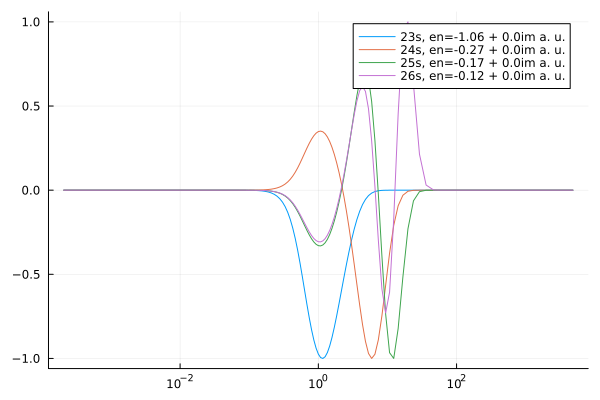

In [1040]:
include("matutils.jl")
using .MatUtils
s_is = inds[dashInds(1:4)]
plot()
for s_i in s_is
    plot!(grid_ecp.xs.*cpars_ecp.scale, vectors[1:cpars_ecp.N, s_i].*(-1)^s_i; 
        xaxis=:log, label="$(s_i-61)s, en=$(round(eigs.values[s_i]./(cpars_ecp.scale)^2, digits=2)) a. u.")
end
plot!()

In [1041]:
function aux_norm(cpars, grid, vecs, kappa)
    γ = hfd_funcs.gam(cpars, kappa)
    pqs = reshape(vecs, cpars.N, 2, :)
    an2 = cpars.alpha^2*cpars.Z^2
    res = zeros(eltype(vecs), size(pqs, 3), 2)
    for vi = 1:size(pqs, 3)
        dens = grid.xs.^(2γ) .* (pqs[:, 1, vi].^2 .+ an2 .* pqs[:, 2, vi].^2)
        res[vi, 1] = dot(grid.ws, dens)
        res[vi, 2] = dot(grid.ws, grid.xs .* dens)
    end
    res
end

aux_norm (generic function with 1 method)

In [1042]:
nrs = aux_norm(cpars_ecp, grid_ecp, vectors[:, s_is], 3)
vectors[:, s_is] ./= sqrt.(nrs[:, 1]')
@views nrs ./= nrs[:, 1]
aux_norm(cpars_ecp, grid_ecp, vectors[:, s_is], 3)

4×2 Matrix{Float64}:
 1.0   1.53366
 1.0   6.5776
 1.0  11.2747
 1.0  16.9461

In [1199]:
using Optim
include("gaus_opt.jl")
#using .GausOpt
#alphas = [0.003, 0.007, 0.013, 0.027, 0.046, 0.1268, 0.1501, 0.3065, 0.52, 0.7, 1.1051, 1.8102, 2.4406, 7.06, 7.8113]
active = Vector(1:4)
#active=
tgt = GausOpt.make_target(cpars_ecp, grid_ecp, alphas, 3, 
    vectors[1:cpars_ecp.N, s_is[3:4]]; active=active)
aux2 = optimize(tgt, zeros(length(active)))
alphas_new = round.(GausOpt.scale(alphas, Optim.minimizer(aux2);active=active);digits=4)
@show sort(alphas_new)
@show aux2
display([alphas alphas_new])
alphas = alphas_new;


sort(alphas_new) = [0.0017, 0.0068, 0.0121, 0.022, 0.046, 0.1268, 0.1501, 0.3065, 0.52, 0.7, 1.1051, 1.8102, 2.4406, 7.06, 7.8113]
aux2 =  * Status: success

 * Candidate solution
    Final objective value:     -1.999930e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    179
    f(x) calls:    311



15×2 Matrix{Float64}:
 0.0012  0.0017
 0.0069  0.0068
 0.0134  0.0121
 0.0228  0.022
 0.046   0.046
 0.1268  0.1268
 0.1501  0.1501
 0.3065  0.3065
 0.52    0.52
 0.7     0.7
 1.1051  1.1051
 1.8102  1.8102
 2.4406  2.4406
 7.06    7.06
 7.8113  7.8113

In [1200]:
res = GausOpt.get_coefs(cpars_ecp, grid_ecp, alphas_new, 3, vectors[1:cpars_ecp.N, s_is])
pvecs = GausOpt.make_proj_vecs(cpars_ecp, grid_ecp, res, alphas_new, 3)
nrs_pvecs = grid_ecp.ws' * (pvecs.^2 .* grid_ecp.xs.^2)
pvecs ./=sqrt.(nrs_pvecs)
rhos_pvecs = grid_ecp.ws' * (pvecs.^2 .* grid_ecp.xs.^3)
[alphas_new res.coefs; 
    "ovlap" GausOpt.ovlap(cpars_ecp, grid_ecp, alphas_new, res, 3, vectors[1:cpars_ecp.N, s_is]);
    "norm" nrs_pvecs;
    "<rho>" rhos_pvecs;
    "<rho orig>" aux_norm(cpars_ecp, grid_ecp, vectors[:, s_is], -2)[:,2]']

19×5 Matrix{Any}:
 0.0017         -7.0346e-5    -0.000238106  -0.000661059  -0.00887407
 0.0068          0.000620557   0.00294712   -0.0222519    -1.03588
 0.0121         -0.00171325   -0.00470136   -0.554792     -0.153511
 0.022           0.00271693    0.227029     -0.609583      1.15318
 0.046          -0.00480028    0.633352      0.513071     -0.384088
 0.1268          0.0200643     0.736422      0.840031     -0.777107
 0.1501         -0.0994415    -0.548566     -0.641077      0.59047
 0.3065         -0.169134      0.140784      0.18547      -0.172407
 0.52           -0.239815     -0.287801     -0.332952      0.296713
 0.7            -0.045833      0.221735      0.278664     -0.252179
 1.1051         -0.388629     -0.189739     -0.199273      0.172402
 1.8102          0.0102402     0.0730002     0.0898821    -0.0804964
 2.4406         -0.316703     -0.0965086    -0.0902032     0.0754909
 7.06           -0.25375      -0.0353229    -0.0199189     0.0135429
 7.8113          0.192028   

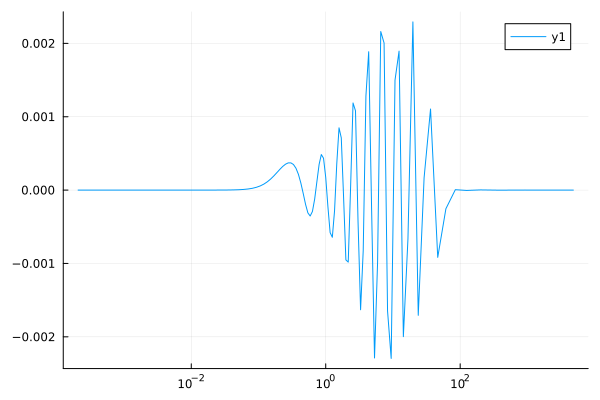

In [1204]:
plot(grid_ecp.xs, [pvecs[:, 4].*grid_ecp.xs .- vectors[1:cpars_ecp.N, s_is[4]]]; xaxis=:log)

In [157]:
grid_ecp.ws' * (pvecs.*grid_ecp.xs).^2

1×4 adjoint(::Vector{Float64}) with eltype Float64:
 0.998146  0.99943  0.999749  0.514587

In [815]:
#open("Th_gaus_ecp2.txt", "a") do io
#    println(io, repr("text/plain", [alphas_new res.coefs]))
#end
push!(alphas_arr = [alphas]

1-element Vector{Vector{Float64}}:
 [0.0219, 0.04, 0.1015, 0.1414, 0.2861, 0.498, 1.0985, 1.9947, 3.5594, 5.6437, 7.2079, 9.9145]

In [554]:
alphas_arr = []
ls = []
open("Th_gaus_ecp2.txt", "r") do io
    state = 0 
    for line in eachline(io)
        line = strip(line)
        if length(line) == 0
            continue
        end
        if length(line) == 1 && lowercase(line[1]) ∈ "spdfgh"
            state = 1
            lval = findfirst(line[1] .== "spdfgh")
            push!(ls, lval)
            push!(alphas_arr, Float64[])
            continue
        end
        if (state==0) 
            continue
        end
        aux = split(line)
        @assert length(aux)>1
        a=parse(Float64, aux[1])
        push!(alphas_arr[end], a)
    end
end

In [1205]:
push!(alphas_arr, alphas)

4-element Vector{Vector{Float64}}:
 [0.0219, 0.04, 0.1015, 0.1414, 0.2861, 0.498, 1.0985, 1.9947, 3.5594, 5.6437, 7.2079, 9.9145]
 [0.0071, 2.0, 0.0169, 0.028, 0.0536, 0.1061, 0.2171, 0.33, 0.5254, 1.4718, 4.1103, 4.7292]
 [0.0106, 0.0186, 0.0343, 0.066, 0.122, 0.2185, 0.3, 0.5, 0.5572, 0.8669, 1.5643, 3.15, 6.903, 11.1306]
 [0.0017, 0.0068, 0.0121, 0.022, 0.046, 0.1268, 0.1501, 0.3065, 0.52, 0.7, 1.1051, 1.8102, 2.4406, 7.06, 7.8113]

In [1220]:
filebas = open("Th_gaus_ecp.txt", "w")
for l=0:3, s=-1:2:1
    if (l-s)<0 
        continue
    end
    κ = (l + div(1-s, 2))*s 
    j = l-s/2
    lhs, rhs = hfd_funcs.dirac_h1(cpars_ecp, grid_ecp, 1)
    hfd_funcs.lhs_rhs!(cpars_ecp, grid_ecp, κ, occ_block_ecp, lhs, rhs; ecp=ecp, 
    pot_func=hfd_funcs.hfd_pot)
    eigs = eigen(lhs, rhs)
    values = real(eigs.values)
    vectors = real(eigs.vectors)
    inds = findall(real(eigs.values) .> -(cpars_ecp.Z * cpars_ecp.scale)^2)
    s_is = inds[dashInds(1:4)]
    nrs = aux_norm(cpars_ecp, grid_ecp, vectors[:, s_is], κ)
    vectors[:, s_is] ./= sqrt.(nrs[:, 1]')
    @views vectors[1:cpars_ecp.N, s_is] .*= grid_ecp.xs.^hfd_funcs.gam(cpars_ecp, κ)
    @views values ./= cpars_ecp.scale^2
    
    alphas_new = alphas_arr[l+1]
    res = GausOpt.get_coefs(cpars_ecp, grid_ecp, alphas_new, l, vectors[1:cpars_ecp.N, s_is])
    pvecs = GausOpt.make_proj_vecs(cpars_ecp, grid_ecp, res, alphas_new, l)
    nrs_pvecs = grid_ecp.ws' * (pvecs.^2 .* grid_ecp.xs.^2)
    pvecs ./=sqrt.(nrs_pvecs)
    rhos_pvecs = grid_ecp.ws' * (pvecs.^2 .* grid_ecp.xs.^3)
    println(filebas, "$("SPDFGH"[l+1])$j κ = $κ $(length(alphas_new)) $(length(s_is))")
    println(filebas,repr("text/plain", [alphas_new res.coefs;
        "energy" values[s_is]';
        "ovlap" GausOpt.ovlap(cpars_ecp, grid_ecp, alphas_new, res, l, vectors[1:cpars_ecp.N, s_is]);
        "norm" nrs_pvecs;
        "<rho>" rhos_pvecs;
        "<rho orig>" (nrs[:, 2]./nrs[:, 1])']))
end
close(filebas)